<h1> DS200A Computer Vision Assignment</h1>

In [1]:
from datainput import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from PIL import Image, ImageChops


train_path = './20_categories_training/'
val_path = './20_Validation/'
# try not to printout train_data['Pictures'] directly, takes a while
train_data = read_train_data(train_path)
test_data = read_test_data(val_path)

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [28]:
class feature_extract:
    """class method for easy plotting and function call"""
    def __init__(self):
        self.names = {0:"image size",
                        1:"aspect ratio",
                        2:"red-channel average",
                        3:"green-channel average",
                        4:"blue-channel average",
                        5:"red-channel variance",
                        6:"green-channel variance",
                        7:"blue-channel variance",
                        8:"laplacian average",
                        9:"laplacian variance",
                      
                        11:"red-channel quantiles",
                        12:"green-channel quantiles",
                        13:"blue-channel quantiles",
                        14:"laplacian quantiles",
                        15:"upsampled gray image"}
        
        self.funcs = {0:feature_extract.ft_size, 
                    1:feature_extract.ft_aspect_ratio,
                    2:feature_extract.ft_r_mean,
                    3:feature_extract.ft_g_mean,
                    4:feature_extract.ft_b_mean,
                    5:feature_extract.ft_r_var,
                    6:feature_extract.ft_g_var,
                    7:feature_extract.ft_b_var,
                    8:feature_extract.ft_e_mean,
                    9:feature_extract.ft_e_var, 
                      
                    11:feature_extract.ft_r_quantile,
                    12:feature_extract.ft_g_quantile,
                    13:feature_extract.ft_b_quantile,
                    14:feature_extract.ft_e_quantile,
                    15:feature_extract.ft_shrinked_gray}
        
        self.labels = {0:"Airplanes", 1:"Bear", 2:"Blimp", 3:"Comet", 4:"Crab", 
           5:"Dog", 6:"Dolphin", 7:"Giraffe", 8:"Goat", 9:"Gorilla", 
           10:"Kangaroo", 11:"Killer-Whale", 12:"Leopards", 13:"Llama", 
           14:"Penguin", 15:"Porcupine", 16:"Teddy-Bear", 17:"Triceratops", 
           18:"Unicorn", 19:"Zebra"}
        
    
    
    ### scalar features
    @staticmethod
    def ft_size(image):
        # Returns the pixel size of the image
        return image.size
    @staticmethod
    def ft_aspect_ratio(image):
        #Returns the aspect ratio of the image
        return image.shape[1]/image.shape[0]
    @staticmethod
    def ft_r_mean(image):
        # Returns the average of the red-channel pictures for the images
        return np.mean(image[:,:,0]) if len(image.shape)==3 else np.mean(image)
    @staticmethod
    def ft_g_mean(image):
        # the average of the green-channel pictures for the images
        return np.mean(image[:,:,1]) if len(image.shape)==3 else np.mean(image)
    @staticmethod
    def ft_b_mean(image):
        # the average of the blue-channel pictures for the images
        return np.mean(image[:,:,2]) if len(image.shape)==3 else np.mean(image)
    @staticmethod
    def ft_r_var(image):
        # the absolute variance of the red-channel for the images
        return np.var(image[:,:,0]) if len(image.shape)==3 else np.var(image)
    @staticmethod
    def ft_g_var(image):
        # the absolute variance of the blue-channel for the images
        return np.var(image[:,:,1]) if len(image.shape)==3 else np.var(image)
    @staticmethod
    def ft_b_var(image):
        # the absolute variance of the green-channel for the images
        return np.var(image[:,:,2]) if len(image.shape)==3 else np.var(image)
    
    @staticmethod
    def ft_e_mean(image):
        # obtain laplacian/edge mean
        return np.mean(image)
    @staticmethod
    def ft_e_var(image):
        # obtain laplacian/edge variance
        return np.var(image)
    
        

    
    
    ### matrix features    
    
    @staticmethod
    def ft_r_quantile(image):
        # find various qunatile values in red channel
        return feature_extract.quantiles(image[:,:,0]) if len(image.shape)==3 else feature_extract.quantiles(image[:,:])
    @staticmethod
    def ft_g_quantile(image):
        # find various qunatile values in green channel
        return feature_extract.quantiles(image[:,:,1]) if len(image.shape)==3 else feature_extract.quantiles(image[:,:])
    @staticmethod
    def ft_b_quantile(image):
        # find various qunatile values in blue channel
        return feature_extract.quantiles(image[:,:,2]) if len(image.shape)==3 else feature_extract.quantiles(image[:,:])
    @staticmethod
    def ft_e_quantile(image):
        # find quantile values in laplacian/edge 
        return feature_extract.quantiles(image)
    
    @staticmethod
    def ft_get_edge(image):
        image = feature_extract.convert_grey(image)
        return cv2.Laplacian(image, cv2.CV_64F, ksize=11)
    
    
    # helper functions
    @staticmethod
    def quantiles(image_single_color, divide = np.arange(0,1.1,0.1)):
        return np.quantile(image_single_color.flatten(), divide)
    
    @staticmethod
    def resize_image(image, xsize = 20, ysize = 15):
        # resize to 4x3 images
        return cv2.resize(image, (xsize, ysize), interpolation=cv2.INTER_AREA)
    
    @staticmethod
    def convert_grey(image):
        # convert rgb image to gray
        if len(image.shape) == 2: return image
        return 0.2989 * image[:,:,0] + 0.5870 * image[:,:,1] + 0.1140 * image[:,:,2]
    
    @staticmethod
    def trim(image):
        # trim empty background spaces
        image = Image.fromarray(image)
        bg1 = Image.new(image.mode, image.size, image.getpixel((0,0)))
        
        diff1 = ImageChops.difference(image, bg1)
        diff1 = ImageChops.add(diff1, diff1, 2.0, -100)
        bbox1 = diff1.getbbox()
        if bbox1:
            image = image.crop(bbox1)
        
        bg2 = Image.new(image.mode, image.size, image.getpixel((image.width-1,image.height-1)))
        diff2 = ImageChops.difference(image, bg2)
        diff2 = ImageChops.add(diff2, diff2, 2.0, -100)
        bbox2 = diff2.getbbox()
        if bbox2:
            image = image.crop(bbox2)
            
        return np.array(image)
    
    
    # intermediate functions
    @staticmethod
    def trim_all(images):
        # convert images series
        return images.apply(feature_extract.trim)
    @staticmethod
    def edge_all(images):
        # convert images seris
        return images.apply(feature_extract.ft_get_edge)
    

<h4> Graphs </h4>

 We expect all external sources sited, and significant indication of EDA. 

In [658]:
# findout sizes of all images
xyz = pd.DataFrame(train_data.Pictures.apply(lambda x: x.shape).tolist(), columns=['Y','X','Z'])
xyz.describe()

,Y,X,Z
count,1501.000000,1501.000000,1485.0
mean,303.802798,372.592272,3.0
std,205.649112,239.645155,0.0
min,1.000000,1.000000,3.0
25%,174.000000,225.000000,3.0
50%,267.000000,309.000000,3.0
75%,389.000000,461.000000,3.0
max,3055.000000,3424.000000,3.0


In [8]:
edges = feature_extract.edge_all(train_data.Pictures)

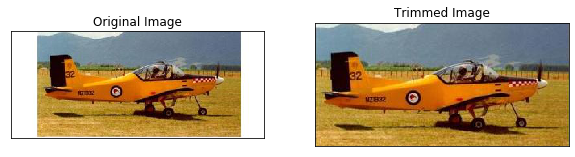

In [44]:
img = train_data.iloc[0,0]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
cropped = feature_extract.trim(img)
plt.subplot(1,2,2), plt.imshow(cropped), plt.title('Trimmed Image'), plt.xticks([]), plt.yticks([])
plt.savefig('images/trimexample')
plt.show()

In [550]:
# check aspect ratio to decide resized image ratio
pd.Series(train_data.Pictures.apply(feature_extract.ft1)).describe()

count    1501.000000
mean        1.271221
std         0.427860
min         0.525397
25%         0.918333
50%         1.333333
75%         1.500000
max         3.469027
Name: Pictures, dtype: float64

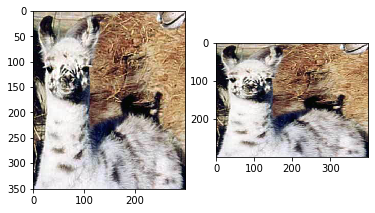

In [711]:
# example of resizing image
img = train_data.Pictures[999]
plt.subplot(1,2,1), plt.imshow(img)
img_resized = resize(img, (300, 400), anti_aliasing=True)
plt.subplot(1,2,2), plt.imshow(img_resized)
plt.show()

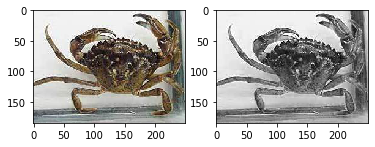

In [45]:
# example of single color image
img = train_data.Pictures[302]
plt.subplot(1,2,1), plt.imshow(img)
img_single_color = img[:,:,0]
plt.subplot(1,2,2), plt.imshow(img_single_color, cmap = 'gray')
plt.show()

In [ ]:
img = train_data.iloc[302,0]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
cropped = feature_extract.trim(img)
plt.subplot(1,2,2), plt.imshow(cropped), plt.title('Trimmed Image'), plt.xticks([]), plt.yticks([])
plt.savefig('images/trimexample')
plt.show()

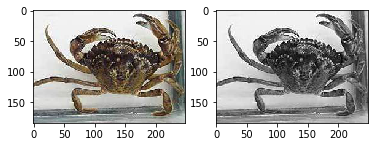

In [586]:
# example of converting to grey image
fe = feature_extract()
img = train_data.Pictures[302]
plt.subplot(1,2,1), plt.imshow(img)
img_grey = fe.convert_grey(img)
plt.subplot(1,2,2), plt.imshow(img_grey, cmap = 'gray')
plt.show()

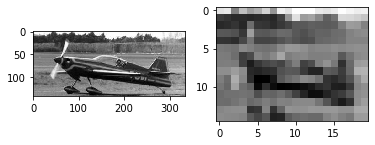

In [696]:
# example of pooling on grey images
img = train_data.Pictures[10]
img_grey = fe.convert_grey(img)
plt.subplot(1,2,1), plt.imshow(img_grey, cmap = 'gray')
img_resized = feature_extract.resize_image(img_grey, 20, 15)
plt.subplot(1,2,2), plt.imshow(img_resized, cmap = 'gray')
plt.show()

<h5> 1. Check Scalar Features </h5>

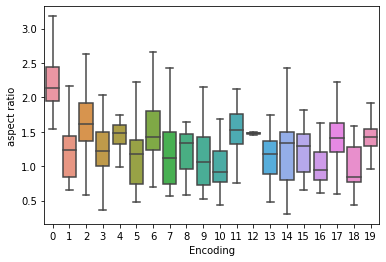

In [588]:
# visualize feature spread over different categories
# check if there is any meaningful difference
fe = feature_extract() # feature extract instance
choice = 1 # choose from 0-4
feature = train_data.Pictures.apply(fe.funcs[choice])
sns.boxplot(train_data.Encoding, feature, showfliers=False)
plt.ylabel(fe.names[choice])
plt.show()

<h5> 2. Check Matrix Features </h5>

In [211]:
train_data.iloc[[1,100,20]]

,Pictures,Encoding
1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",0
100,"[[[255, 252, 251], [255, 253, 255], [253, 254,...",1
20,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0


<h4> Sources </h4>

<h5> Referenced: </h5>

1. Canny Edge Detection, https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html 

2. Oriented FAST and Rotated BRIEF, https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html#orb


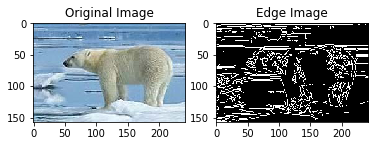

In [707]:
# Canny edge detection
img = train_data.iloc[100,0]
edges = cv2.Canny(img, 50, 250)

plt.subplot(121),plt.imshow(img)
plt.title('Original Image')
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image')
plt.show()

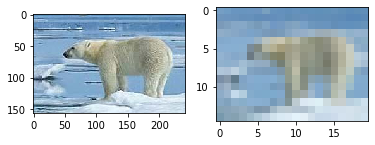

In [708]:
plt.subplot(1,2,1), plt.imshow(img, cmap = 'gray')
img_resized = feature_extract.resize_image(img, 20, 15)
plt.subplot(1,2,2), plt.imshow(img_resized, cmap = 'gray')
plt.show()

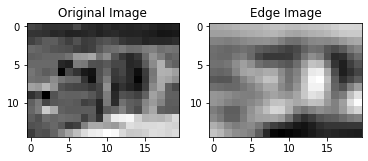

In [709]:
img = fe.convert_grey(img_resized)
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=11)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(laplacian,cmap = 'gray')
plt.title('Edge Image')
plt.show()

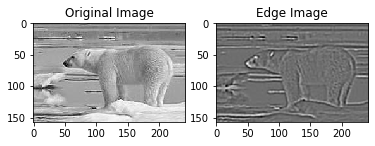

In [705]:
img = fe.convert_grey(img)
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=11)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(laplacian,cmap = 'gray')
plt.title('Edge Image')
plt.show()

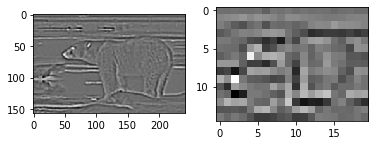

In [706]:
# pooling on edge image
img = laplacian
plt.subplot(1,2,1), plt.imshow(img, cmap = 'gray')
img_resized = resize(img, (15, 20), anti_aliasing=True)
plt.subplot(1,2,2), plt.imshow(img_resized, cmap = 'gray')
plt.show()

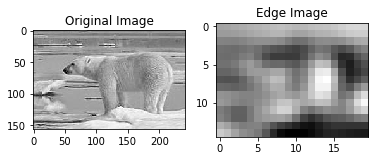

In [660]:
img = train_data.iloc[100,0]
img = fe.convert_grey(img)
img_resized = resize(img, (15, 20), anti_aliasing=True)
laplacian = cv2.Laplacian(img_resized, cv2.CV_64F, ksize=11)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(laplacian,cmap = 'gray')
plt.title('Edge Image')
plt.show()

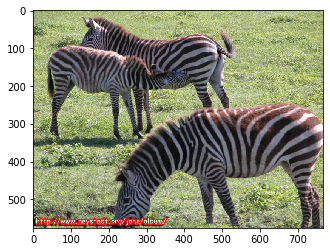

In [634]:
plt.imshow(feature_extract.trim(train_data.iloc[1500,0]))

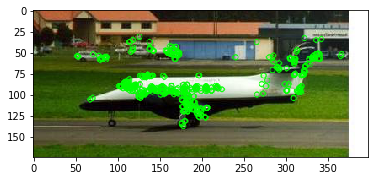

(<matplotlib.image.AxesImage at 0x1c61ed9b50>, None)

In [595]:
img = train_data.iloc[1,0]

# Initiate STAR detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img, None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, np.array([]), color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

<h4> DataFrame Creation </h4>

In [635]:
# trim all images first
feature_extract.trim_all(images)

In [36]:
def feature_frame(df):
    # input original training_data set
    FE = feature_extract()
    images = df.Pictures
    # trim all images
    print('Trim all images..')
    images = FE.trim_all(images)
    df_X = pd.DataFrame()
    
    for i in range(2):
        print('Processing..',FE.names[i])
        df_X[FE.names[i]] = images.apply(FE.funcs[i])
    # convert all images to same size first 400x300
    images = pd.Series(images.apply(lambda x: FE.resize_image(x, 400, 300)))
    # cache laplacian
    laplacian = FE.edge_all(images)
    # add all scalar features
    for i in range(2,10):
        print('Processing..',FE.names[i])
        if i in [8,9]:
            df_X[FE.names[i]] = laplacian.apply(FE.funcs[i])
        else:
            df_X[FE.names[i]] = images.apply(FE.funcs[i])
    
    for j in range(11,15):
        print('Processing..',FE.names[j])
        if j == 14:
            temp = laplacian.apply(FE.funcs[j]).tolist()
        else:
            temp = images.apply(FE.funcs[j]).tolist()
        temp = pd.DataFrame(temp, columns=[FE.names[j]+'_'+str(x) for x in np.arange(len(temp[0]))])
        df_X = pd.concat([df_X, temp], axis=1)
    if 'Encoding' in df.columns:
        df_X['Encoding'] = df.Encoding
    return df_X


In [37]:
if __name__ == "__main__":
    temp = feature_frame(train_data.iloc[:100,])

Trim all images..
Processing.. image size
Processing.. aspect ratio
Processing.. red-channel average
Processing.. green-channel average
Processing.. blue-channel average
Processing.. red-channel variance
Processing.. green-channel variance
Processing.. blue-channel variance
Processing.. laplacian average
Processing.. laplacian variance
Processing.. red-channel quantiles
Processing.. green-channel quantiles
Processing.. blue-channel quantiles
Processing.. laplacian quantiles


In [38]:
np.linalg.matrix_rank(temp)

55